## Sales Data Visulization

##### Import libraries

In [65]:
# 🔹 Data handling
import pandas as pd
import numpy as np

# 🔹 Visualization
import matplotlib.pyplot as plt

# 🔹 Date handling (optional, agar date ke saath kaam karna ho)
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Step 1: Dataset Load karo

In [4]:
df = pd.read_csv('sales_data_5000.csv')
df.head(5)

,OrderID,Date,Customer,Region,Category,Product,Quantity,UnitPrice,TotalSales
0,1001,2025-08-02,C0001,South,Furniture,Bed,7,59458,416206
1,1002,2025-07-10,C0002,West,Furniture,Sofa,9,49934,449406
2,1003,2025-07-25,C0003,North,Electronics,Mobile,14,53461,748454
3,1004,2025-06-02,C0004,North,Furniture,Chair,9,4664,41976
4,1005,2025-03-05,C0005,West,Furniture,Bed,17,48131,818227


### Q1. Monthly Sales Trend

In [11]:
# Step 1: Convert Date column to datetime
datetime = df["Date"] = pd.to_datetime(df["Date"])
datetime

0      2025-08-02
1      2025-07-10
2      2025-07-25
3      2025-06-02
4      2025-03-05
          ...    
4995   2025-08-19
4996   2025-07-02
4997   2025-08-20
4998   2025-06-13
4999   2025-05-28
Name: Date, Length: 5000, dtype: datetime64[ns]

In [13]:
# Step 2: Month column banana (Year + Month)
month = df["month"] = df["Date"].dt.to_period("M")
month

0       2025-08
1       2025-07
2       2025-07
3       2025-06
4       2025-03
         ...   
4995    2025-08
4996    2025-07
4997    2025-08
4998    2025-06
4999    2025-05
Name: Date, Length: 5000, dtype: period[M]

In [14]:
# Step 3: Har month ka total sales nikalna
monthly_sales = df.groupby("month")["TotalSales"].sum()
monthly_sales

month
2025-02      9961759
2025-03    270476084
2025-04    270918791
2025-05    261130211
2025-06    249635119
2025-07    271704269
2025-08    268252880
Freq: M, Name: TotalSales, dtype: int64

## Step 2: Visualization (Line Chart)

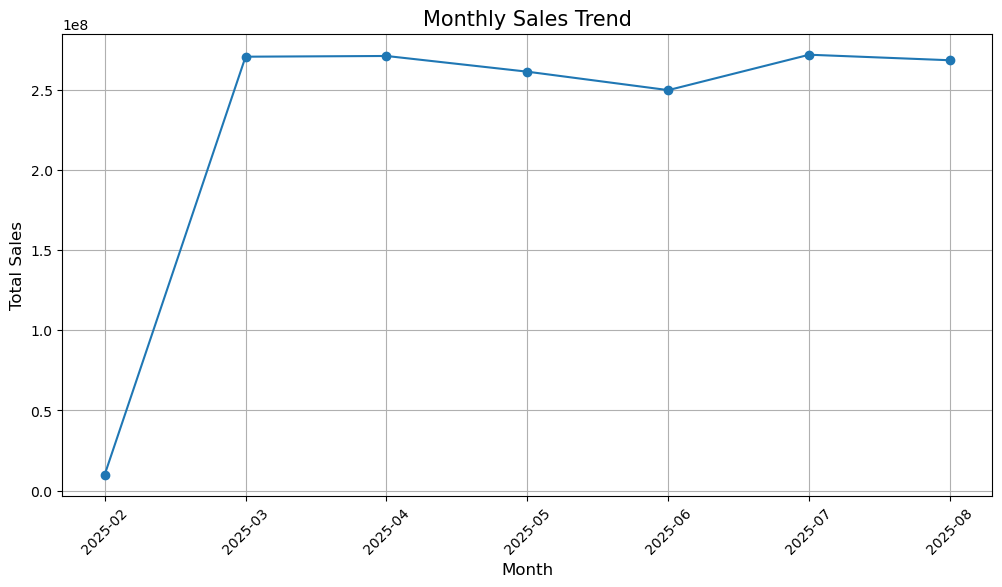

In [34]:
plt.figure(figsize=(12, 6))
# df.head()
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title(('Monthly Sales Trend'), fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Q2. Category-wise Sales Distribution

#### Step 1: Group by Category

In [37]:
df.head()

,OrderID,Date,Customer,Region,Category,Product,Quantity,UnitPrice,TotalSales,month
0,1001,2025-08-02,C0001,South,Furniture,Bed,7,59458,416206,2025-08
1,1002,2025-07-10,C0002,West,Furniture,Sofa,9,49934,449406,2025-07
2,1003,2025-07-25,C0003,North,Electronics,Mobile,14,53461,748454,2025-07
3,1004,2025-06-02,C0004,North,Furniture,Chair,9,4664,41976,2025-06
4,1005,2025-03-05,C0005,West,Furniture,Bed,17,48131,818227,2025-03


In [38]:
category_sales = df.groupby("Category")["TotalSales"].sum()
category_sales

Category
Clothing       525561542
Electronics    526481677
Furniture      550035894
Name: TotalSales, dtype: int64

### Step 2: Visualization (Pie Chart)

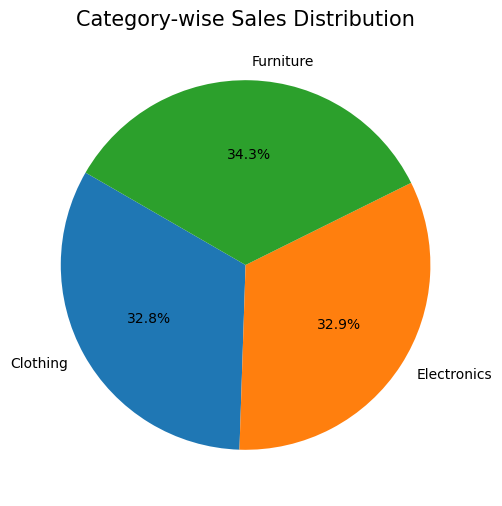

In [46]:
plt.figure(figsize=(12, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=150)
plt.title("Category-wise Sales Distribution", fontsize=15)
plt.show()

## Q3. Region-wise Sales

### ✅ Step 1: Group by Region

In [48]:
region_sales = df.groupby("Region")["TotalSales"].sum()
region_sales

Region
East     381844295
North    413516318
South    415153859
West     391564641
Name: TotalSales, dtype: int64

### ✅ Step 2: Visualization (Bar Chart)

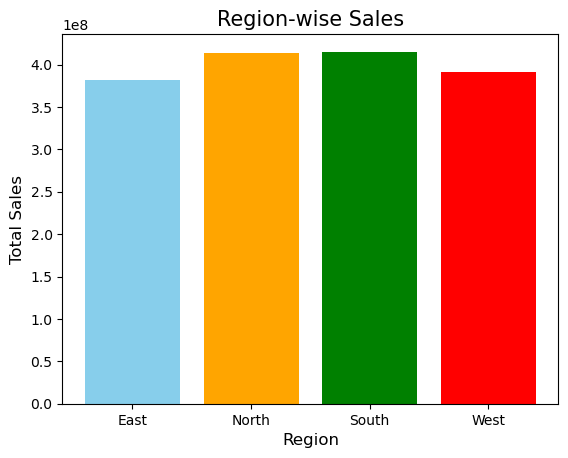

In [57]:
plt.Figure(figsize=(12, 6))
plt.bar(region_sales.index, region_sales.values, color=['skyblue', 'orange', 'green', 'red'])
plt.title("Region-wise Sales", fontsize=15)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
# plt.xticks(rotation=45)
plt.show()

## Q4. Top 10 Products by Sales

### 2️ Product-wise total sales calculate karo

C:\Users\Aashish saini\AppData\Local\Temp\ipykernel_13344\2519632005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Product', data=top10_products, palette='magma')


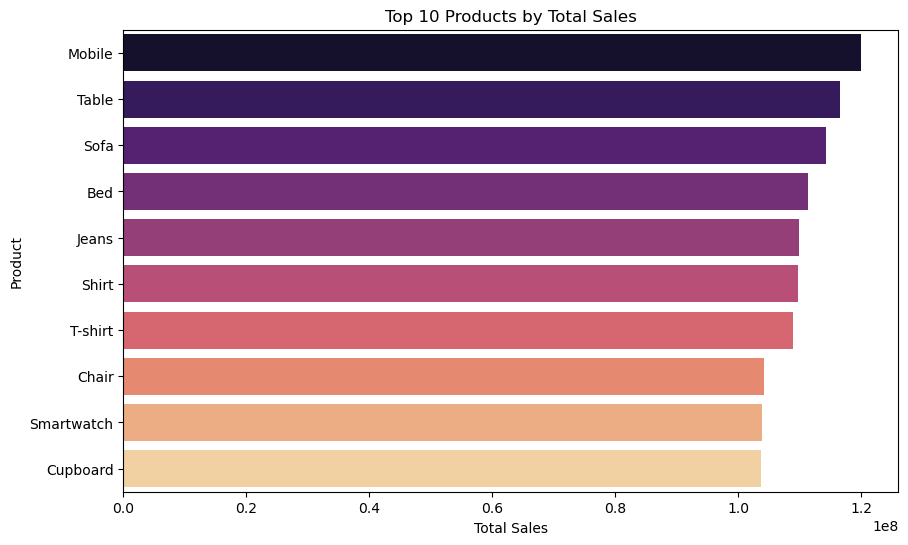

In [79]:
import matplotlib.pyplot as plt
product_sales = df.groupby("Product")["TotalSales"].sum().reset_index()

# Top 10 products pick karo (descending order)
top_10_products = product_sales.sort_values(by="TotalSales",ascending=False).head(10)

# Horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='TotalSales', y='Product', data=top10_products, palette='magma')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

## Q5. Customer Purchase Behavior

###  Scatter plot

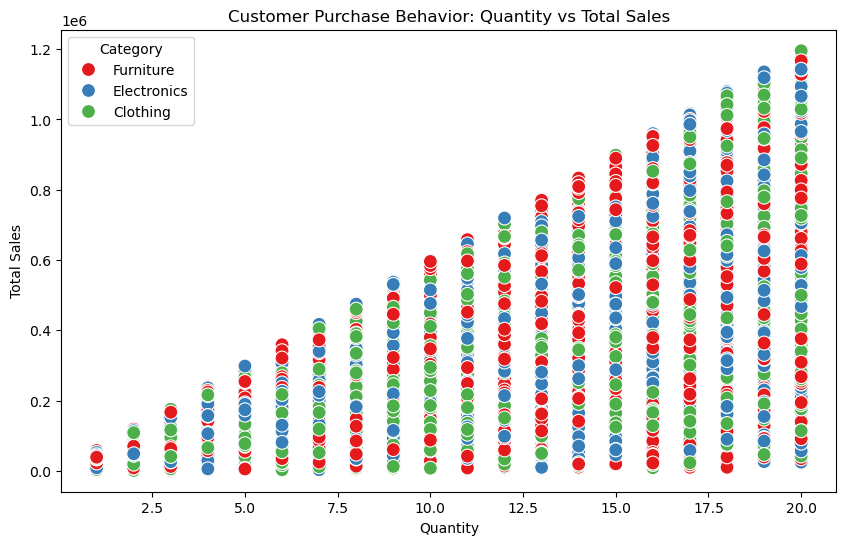

In [81]:
#  Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='TotalSales', data=df, hue='Category', palette='Set1',s=100)
plt.title('Customer Purchase Behavior: Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()

## Q6. Average Order Value (AOV) by Category

### Category-wise Average Order Value calculate

C:\Users\Aashish saini\AppData\Local\Temp\ipykernel_13344\223841753.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='AOV', data=aov_category, palette='coolwarm')


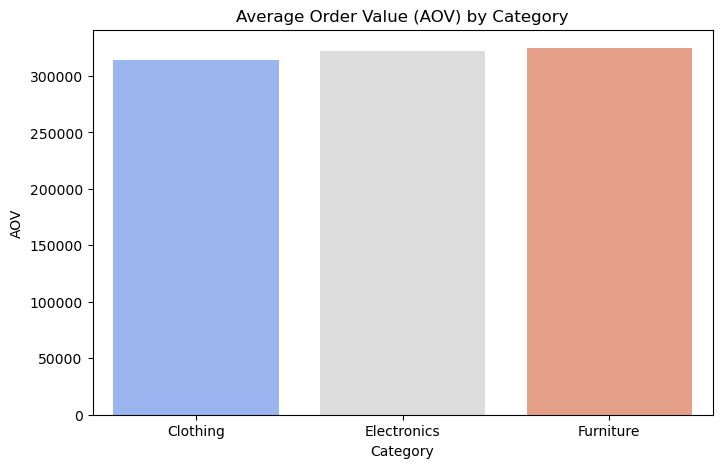

In [82]:
# 2️ Category-wise Average Order Value calculate
# AOV = SUM(TotalSales) / COUNT(OrderID)
aov_category = df.groupby('Category').agg(
    TotalSales=('TotalSales','sum'),
    Orders=('OrderID','nunique')  # unique orders count
).reset_index()

aov_category['AOV'] = aov_category['TotalSales'] / aov_category['Orders']

# 3️ Bar chart 
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='AOV', data=aov_category, palette='coolwarm')
plt.title('Average Order Value (AOV) by Category')
plt.xlabel('Category')
plt.ylabel('AOV')
plt.show()

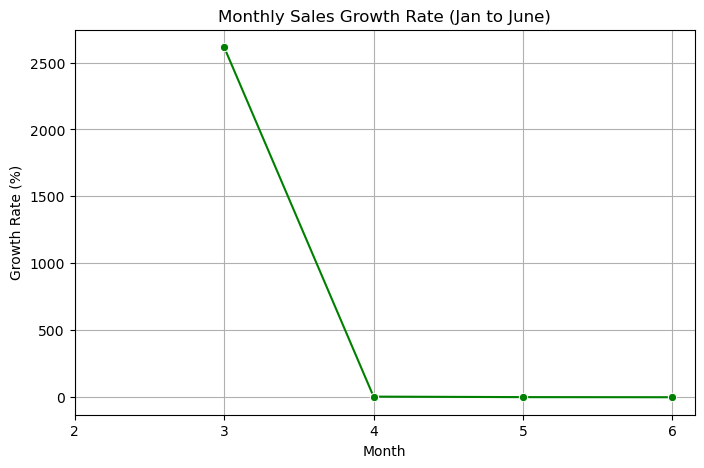

In [83]:
# 2️⃣ Date column ko datetime me convert karo
df['Date'] = pd.to_datetime(df['Date'])

# 3️⃣ Month-wise total sales calculate (Jan to June)
df['Month'] = df['Date'].dt.month
monthly_sales = df[df['Month'].between(1,6)].groupby('Month')['TotalSales'].sum().reset_index()

# 4️⃣ Sales Growth Rate calculate
monthly_sales['GrowthRate'] = monthly_sales['TotalSales'].pct_change() * 100  # % change

# 5️⃣ Line chart banao
plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='GrowthRate', data=monthly_sales, marker='o', color='green')
plt.title('Monthly Sales Growth Rate (Jan to June)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.show()

## Q8. Top 5 Customers

C:\Users\Aashish saini\AppData\Local\Temp\ipykernel_13344\1415721790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Customer', data=top5_customers, palette='Blues_r')


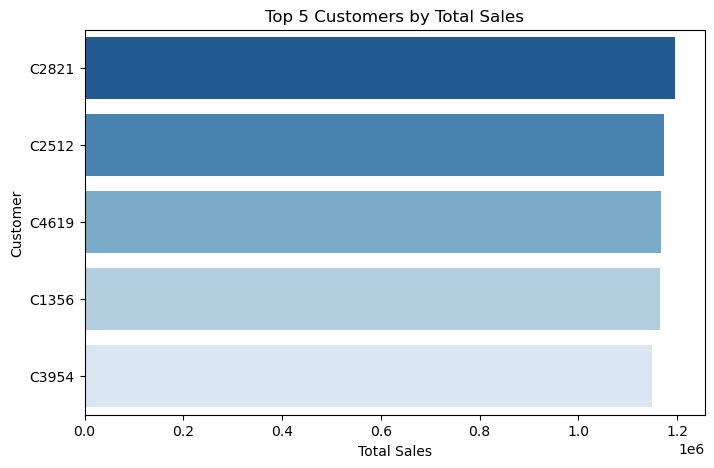

In [84]:
# 2️⃣ Customer-wise total sales calculate
customer_sales = df.groupby('Customer')['TotalSales'].sum().reset_index()

# 3️⃣ Top 5 customers pick karo
top5_customers = customer_sales.sort_values(by='TotalSales', ascending=False).head(5)

# 4️⃣ Bar chart banao
plt.figure(figsize=(8,5))
sns.barplot(x='TotalSales', y='Customer', data=top5_customers, palette='Blues_r')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.show()

## Q9. Category Sales Trend by Month

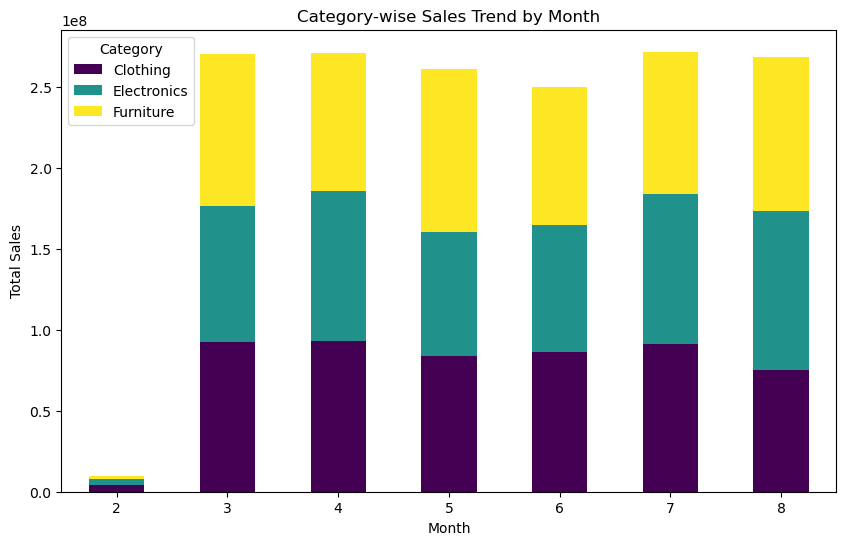

In [85]:
# 2️⃣ Date column ko datetime me convert karo
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# 3️⃣ Month + Category wise total sales calculate
monthly_category_sales = df.groupby(['Month','Category'])['TotalSales'].sum().unstack()

# 4️⃣ Stacked bar chart banao
monthly_category_sales.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Category-wise Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

## Q10. Profitability Analysis

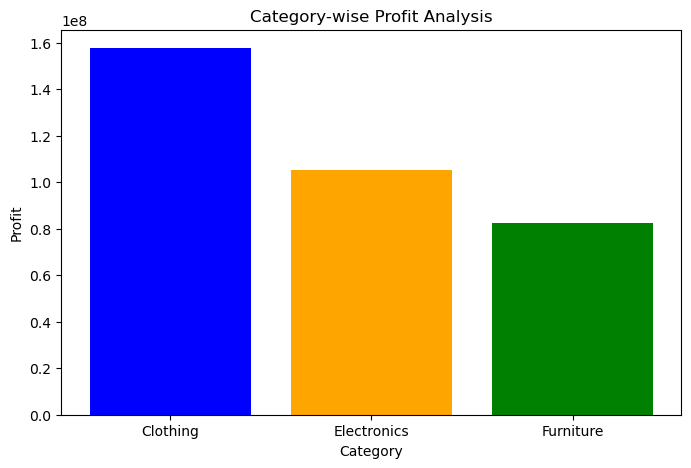

In [86]:
# 2️⃣ Category-wise profit margin define karo
profit_margin = {
    'Electronics': 0.20,
    'Furniture': 0.15,
    'Clothing': 0.30
}

# 3️⃣ Category-wise total sales calculate
category_sales = df.groupby('Category')['TotalSales'].sum().reset_index()

# 4️⃣ Profit calculate karo
category_sales['Profit'] = category_sales['Category'].map(profit_margin) * category_sales['TotalSales']

# 5️⃣ Bar chart banao
plt.figure(figsize=(8,5))
plt.bar(category_sales['Category'], category_sales['Profit'], color=['blue','orange','green'])
plt.title('Category-wise Profit Analysis')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()